In [1]:
# Random Forest
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from matplotlib import rc
from matplotlib import font_manager as fm
from matplotlib import rcParams
import matplotlib as mpl


In [42]:

#nanum 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
#여기가 폰트 사이즈를 정하는 곳.
font_name = fm.FontProperties(fname=path, size=16).get_name()
print(font_name)
plt.rc('font', family=font_name)

sys_font number: 48
nanum_font number: 31
Python 3.6.9
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0
NanumBarunGothic


In [43]:
fm._rebuild()

In [44]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
pop = pd.read_csv('/content/drive/My Drive/project/seoul_contest/서울시 주민등록인구 (연령별동별) 통계.txt',header=None , sep='\t')

In [3]:
crime = pd.read_pickle('/content/drive/My Drive/project/seoul_contest/범죄율_주차구역_동별.pkl')
# age = pd.read_pickle('/content/drive/My Drive/project/seoul_contest/행정동별_5-14세_거주인구.pkl')
# welfare = pd.read_pickle('/content/drive/My Drive/project/seoul_contest/복지시설(대중교통,도서관,박물관,미술관,공원)행정동별매칭.pkl')
med = pd.read_pickle('/content/drive/My Drive/project/seoul_contest/건축대장_의료시설.pickle')


### 주차장 + 의료시설 + 범죄율 + 초등인구 합치기 !

In [4]:
# med.drop(['시군구명','행정동명'],axis=1,inplace=True)

In [5]:
med

,행정동코드,시군구명,행정동명,의료시설_개수,의료시설_건축면적(㎡),의료시설_건폐율(%)
0,1111053000,종로구,사직동,2.0,104.130000,39.368600
1,1111054000,종로구,삼청동,0.0,0.000000,0.000000
2,1111055000,종로구,부암동,0.0,0.000000,0.000000
3,1111056000,종로구,평창동,1.0,2012.800000,44.220000
4,1111057000,종로구,무악동,2.0,500.890000,51.570000
...,...,...,...,...,...,...
420,1174070000,강동구,둔촌제2동,8.0,3078.785000,0.000000
421,1174057000,강동구,암사제1동,1.0,312.830000,59.930000
422,1174061000,강동구,천호제2동,7.0,652.291429,48.617586
423,1174068500,강동구,길동,9.0,734.660000,51.418478


In [6]:
# crime = crime['행정동코드'].sort_values()
crime

,행정동코드,구+동,시군구명,행정동(제),행정동,인구(동),인구(구),합계(개소),합계(면수),동비율,합계(발생),합계(검거),검거율,동(발생),동(검거),동(검거율),인구대비범죄율
1,1111051500,종로구청운효자동,종로구,청운효자동,청운효자동,"12,855","160,520",668,"4,774",0.080083,3846.0,4117.0,107.046282,308.001059,329.703682,1.070463,0.023960
2,1111053000,종로구사직동,종로구,사직동,사직동,"9,787","160,520",360,"14,217",0.060971,3846.0,4117.0,107.046282,234.492911,251.015942,1.070463,0.023960
3,1111054000,종로구삼청동,종로구,삼청동,삼청동,"2,973","160,520",169,"1,853",0.018521,3846.0,4117.0,107.046282,71.231984,76.251190,1.070463,0.023960
4,1111055000,종로구부암동,종로구,부암동,부암동,"10,421","160,520",596,"3,474",0.064920,3846.0,4117.0,107.046282,249.683317,267.276707,1.070463,0.023960
5,1111056000,종로구평창동,종로구,평창동,평창동,"18,696","160,520","1,600","9,620",0.116471,3846.0,4117.0,107.046282,447.949265,479.513033,1.070463,0.023960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1174065000,강동구성내2동,강동구,성내제2동,성내2동,"25,096","461,547","1,935","9,139",0.054374,4014.0,2955.0,73.617339,218.255874,160.674168,0.736173,0.008697
422,1174066000,강동구성내3동,강동구,성내제3동,성내3동,"23,824","461,547","1,431","11,090",0.051618,4014.0,2955.0,73.617339,207.193495,152.530338,0.736173,0.008697
423,1174068500,강동구길동,강동구,길동,길동,"46,950","461,547","2,032","24,822",0.101723,4014.0,2955.0,73.617339,408.316596,300.591814,0.736173,0.008697
424,1174069000,강동구둔촌1동,강동구,둔촌제1동,둔촌1동,274,"461,547",21,388,0.000594,4014.0,2955.0,73.617339,2.382934,1.754253,0.736173,0.008697


In [7]:
# med = med[med['행정동코드'].sort_values()]
med.sort_values('행정동코드',inplace=True)
# crime.sort_values('행정동코드',inplace=True)



In [8]:
crime[crime['행정동']=='신사동']

,행정동코드,구+동,시군구명,행정동(제),행정동,인구(동),인구(구),합계(개소),합계(면수),동비율,합계(발생),합계(검거),검거율,동(발생),동(검거),동(검거율),인구대비범죄율
333,1162068500,관악구신사동,관악구,신사동,신사동,"25,976","516,318","1,883","6,704",0.050310,5328.0,3810.0,71.509009,268.052107,191.681406,0.715090,0.010319
359,1168051000,강남구신사동,강남구,신사동,신사동,"17,270","546,158","1,167","17,424",0.031621,7304.0,5069.0,69.400329,230.958953,160.286272,0.694003,0.013373


In [9]:
age = pd.read_csv('/content/drive/My Drive/project/seoul_contest/인구 (1).csv',encoding='cp949')

In [10]:
med['구+동'] = med['시군구명']+med['행정동명']
crime['구+동2'] = crime['시군구명']+crime['행정동(제)']

In [11]:
med

,행정동코드,시군구명,행정동명,의료시설_개수,의료시설_건축면적(㎡),의료시설_건폐율(%),구+동
15,1111051500,종로구,청운효자동,1.0,0.000000,0.000000,종로구청운효자동
0,1111053000,종로구,사직동,2.0,104.130000,39.368600,종로구사직동
1,1111054000,종로구,삼청동,0.0,0.000000,0.000000,종로구삼청동
2,1111055000,종로구,부암동,0.0,0.000000,0.000000,종로구부암동
3,1111056000,종로구,평창동,1.0,2012.800000,44.220000,종로구평창동
...,...,...,...,...,...,...,...
417,1174065000,강동구,성내제2동,7.0,523.218571,46.427143,강동구성내제2동
418,1174066000,강동구,성내제3동,7.0,523.218571,46.427143,강동구성내제3동
423,1174068500,강동구,길동,9.0,734.660000,51.418478,강동구길동
419,1174069000,강동구,둔촌제1동,8.0,3078.785000,0.000000,강동구둔촌제1동


In [12]:
age['구+동'] = age['자치구']+age['동']
age

,자치구,동,합,구+동
0,종로구,사직동,715,종로구사직동
1,종로구,삼청동,204,종로구삼청동
2,종로구,부암동,805,종로구부암동
3,종로구,평창동,"1,425",종로구평창동
4,종로구,무악동,920,종로구무악동
...,...,...,...,...
420,강동구,둔촌1동,11,강동구둔촌1동
421,강동구,둔촌2동,"2,060",강동구둔촌2동
422,강동구,암사1동,"2,468",강동구암사1동
423,강동구,천호2동,"1,755",강동구천호2동


In [13]:
df = pd.merge(med.set_index('구+동'),crime.set_index('구+동2'),left_index=True,right_index=True)
# all_m = pd.merge(w.set_index('행정동코드'),whole.set_index('행정동코드'),how='outer',left_index=True,right_index=True)
df

,행정동코드_x,시군구명_x,행정동명,의료시설_개수,의료시설_건축면적(㎡),의료시설_건폐율(%),행정동코드_y,구+동,시군구명_y,행정동(제),행정동,인구(동),인구(구),합계(개소),합계(면수),동비율,합계(발생),합계(검거),검거율,동(발생),동(검거),동(검거율),인구대비범죄율
종로구청운효자동,1111051500,종로구,청운효자동,1.0,0.000000,0.000000,1111051500,종로구청운효자동,종로구,청운효자동,청운효자동,"12,855","160,520",668,"4,774",0.080083,3846.0,4117.0,107.046282,308.001059,329.703682,1.070463,0.023960
종로구사직동,1111053000,종로구,사직동,2.0,104.130000,39.368600,1111053000,종로구사직동,종로구,사직동,사직동,"9,787","160,520",360,"14,217",0.060971,3846.0,4117.0,107.046282,234.492911,251.015942,1.070463,0.023960
종로구삼청동,1111054000,종로구,삼청동,0.0,0.000000,0.000000,1111054000,종로구삼청동,종로구,삼청동,삼청동,"2,973","160,520",169,"1,853",0.018521,3846.0,4117.0,107.046282,71.231984,76.251190,1.070463,0.023960
종로구부암동,1111055000,종로구,부암동,0.0,0.000000,0.000000,1111055000,종로구부암동,종로구,부암동,부암동,"10,421","160,520",596,"3,474",0.064920,3846.0,4117.0,107.046282,249.683317,267.276707,1.070463,0.023960
종로구평창동,1111056000,종로구,평창동,1.0,2012.800000,44.220000,1111056000,종로구평창동,종로구,평창동,평창동,"18,696","160,520","1,600","9,620",0.116471,3846.0,4117.0,107.046282,447.949265,479.513033,1.070463,0.023960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
강동구성내제2동,1174065000,강동구,성내제2동,7.0,523.218571,46.427143,1174065000,강동구성내2동,강동구,성내제2동,성내2동,"25,096","461,547","1,935","9,139",0.054374,4014.0,2955.0,73.617339,218.255874,160.674168,0.736173,0.008697
강동구성내제3동,1174066000,강동구,성내제3동,7.0,523.218571,46.427143,1174066000,강동구성내3동,강동구,성내제3동,성내3동,"23,824","461,547","1,431","11,090",0.051618,4014.0,2955.0,73.617339,207.193495,152.530338,0.736173,0.008697
강동구길동,1174068500,강동구,길동,9.0,734.660000,51.418478,1174068500,강동구길동,강동구,길동,길동,"46,950","461,547","2,032","24,822",0.101723,4014.0,2955.0,73.617339,408.316596,300.591814,0.736173,0.008697
강동구둔촌제1동,1174069000,강동구,둔촌제1동,8.0,3078.785000,0.000000,1174069000,강동구둔촌1동,강동구,둔촌제1동,둔촌1동,274,"461,547",21,388,0.000594,4014.0,2955.0,73.617339,2.382934,1.754253,0.736173,0.008697


In [14]:
df2 = pd.merge(df.set_index('구+동'),age.set_index('구+동'),left_index=True,right_index=True)
df2

,행정동코드_x,시군구명_x,행정동명,의료시설_개수,의료시설_건축면적(㎡),의료시설_건폐율(%),행정동코드_y,시군구명_y,행정동(제),행정동,인구(동),인구(구),합계(개소),합계(면수),동비율,합계(발생),합계(검거),검거율,동(발생),동(검거),동(검거율),인구대비범죄율,자치구,동,합
구+동,,,,,,,,,,,,,,,,,,,,,,,,,
종로구청운효자동,1111051500,종로구,청운효자동,1.0,0.000000,0.000000,1111051500,종로구,청운효자동,청운효자동,"12,855","160,520",668,"4,774",0.080083,3846.0,4117.0,107.046282,308.001059,329.703682,1.070463,0.023960,종로구,청운효자동,"1,115"
종로구사직동,1111053000,종로구,사직동,2.0,104.130000,39.368600,1111053000,종로구,사직동,사직동,"9,787","160,520",360,"14,217",0.060971,3846.0,4117.0,107.046282,234.492911,251.015942,1.070463,0.023960,종로구,사직동,715
종로구삼청동,1111054000,종로구,삼청동,0.0,0.000000,0.000000,1111054000,종로구,삼청동,삼청동,"2,973","160,520",169,"1,853",0.018521,3846.0,4117.0,107.046282,71.231984,76.251190,1.070463,0.023960,종로구,삼청동,204
종로구부암동,1111055000,종로구,부암동,0.0,0.000000,0.000000,1111055000,종로구,부암동,부암동,"10,421","160,520",596,"3,474",0.064920,3846.0,4117.0,107.046282,249.683317,267.276707,1.070463,0.023960,종로구,부암동,805
종로구평창동,1111056000,종로구,평창동,1.0,2012.800000,44.220000,1111056000,종로구,평창동,평창동,"18,696","160,520","1,600","9,620",0.116471,3846.0,4117.0,107.046282,447.949265,479.513033,1.070463,0.023960,종로구,평창동,"1,425"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
강동구성내2동,1174065000,강동구,성내제2동,7.0,523.218571,46.427143,1174065000,강동구,성내제2동,성내2동,"25,096","461,547","1,935","9,139",0.054374,4014.0,2955.0,73.617339,218.255874,160.674168,0.736173,0.008697,강동구,성내2동,"1,142"
강동구성내3동,1174066000,강동구,성내제3동,7.0,523.218571,46.427143,1174066000,강동구,성내제3동,성내3동,"23,824","461,547","1,431","11,090",0.051618,4014.0,2955.0,73.617339,207.193495,152.530338,0.736173,0.008697,강동구,성내3동,"1,440"
강동구길동,1174068500,강동구,길동,9.0,734.660000,51.418478,1174068500,강동구,길동,길동,"46,950","461,547","2,032","24,822",0.101723,4014.0,2955.0,73.617339,408.316596,300.591814,0.736173,0.008697,강동구,길동,"2,798"


In [15]:
df2.reset_index(inplace=True)
df2.columns

Index(['구+동', '행정동코드_x', '시군구명_x', '행정동명', '의료시설_개수', '의료시설_건축면적(㎡)',
       '의료시설_건폐율(%)', '행정동코드_y', '시군구명_y', '행정동(제)', '행정동', '인구(동)', '인구(구)',
       '합계(개소)', '합계(면수)', '동비율', '합계(발생)', '합계(검거)', '검거율', '동(발생)', '동(검거)',
       '동(검거율)', '인구대비범죄율', '자치구', '동', '합'],
      dtype='object')

In [16]:
df2.drop([ '행정동명', '행정동코드_y'],axis='columns', inplace=True)
# df2.drop(['level_0', 'index', '시군구명_x', '행정동명', '행정동코드_y'],axis='columns', inplace=True)


In [17]:
df2.drop(['구+동','시군구명_y','행정동(제)','동비율'],axis='columns', inplace=True)

In [18]:
col = [ '의료시설_개수', '의료시설_건축면적(㎡)', '의료시설_건폐율(%)',  '합계(개소)', '합계(면수)', '합계(발생)', '합계(검거)', '검거율', '동(발생)','동(검거)', '동(검거율)', '인구대비범죄율','인구(동)','인구(구)','행정동코드_x' ,'자치구','행정동', '동', '합']

In [19]:
df2 = df2[col]

In [20]:
df2

,의료시설_개수,의료시설_건축면적(㎡),의료시설_건폐율(%),합계(개소),합계(면수),합계(발생),합계(검거),검거율,동(발생),동(검거),동(검거율),인구대비범죄율,인구(동),인구(구),행정동코드_x,자치구,행정동,동,합
0,1.0,0.000000,0.000000,668,"4,774",3846.0,4117.0,107.046282,308.001059,329.703682,1.070463,0.023960,"12,855","160,520",1111051500,종로구,청운효자동,청운효자동,"1,115"
1,2.0,104.130000,39.368600,360,"14,217",3846.0,4117.0,107.046282,234.492911,251.015942,1.070463,0.023960,"9,787","160,520",1111053000,종로구,사직동,사직동,715
2,0.0,0.000000,0.000000,169,"1,853",3846.0,4117.0,107.046282,71.231984,76.251190,1.070463,0.023960,"2,973","160,520",1111054000,종로구,삼청동,삼청동,204
3,0.0,0.000000,0.000000,596,"3,474",3846.0,4117.0,107.046282,249.683317,267.276707,1.070463,0.023960,"10,421","160,520",1111055000,종로구,부암동,부암동,805
4,1.0,2012.800000,44.220000,"1,600","9,620",3846.0,4117.0,107.046282,447.949265,479.513033,1.070463,0.023960,"18,696","160,520",1111056000,종로구,평창동,평창동,"1,425"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,7.0,523.218571,46.427143,"1,935","9,139",4014.0,2955.0,73.617339,218.255874,160.674168,0.736173,0.008697,"25,096","461,547",1174065000,강동구,성내2동,성내2동,"1,142"
421,7.0,523.218571,46.427143,"1,431","11,090",4014.0,2955.0,73.617339,207.193495,152.530338,0.736173,0.008697,"23,824","461,547",1174066000,강동구,성내3동,성내3동,"1,440"
422,9.0,734.660000,51.418478,"2,032","24,822",4014.0,2955.0,73.617339,408.316596,300.591814,0.736173,0.008697,"46,950","461,547",1174068500,강동구,길동,길동,"2,798"
423,8.0,3078.785000,0.000000,21,388,4014.0,2955.0,73.617339,2.382934,1.754253,0.736173,0.008697,274,"461,547",1174069000,강동구,둔촌1동,둔촌1동,11


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   의료시설_개수       425 non-null    float64
 1   의료시설_건축면적(㎡)  425 non-null    float64
 2   의료시설_건폐율(%)   425 non-null    float64
 3   합계(개소)        423 non-null    object 
 4   합계(면수)        423 non-null    object 
 5   합계(발생)        425 non-null    float64
 6   합계(검거)        425 non-null    float64
 7   검거율           425 non-null    float64
 8   동(발생)         425 non-null    float64
 9   동(검거)         425 non-null    float64
 10  동(검거율)        425 non-null    float64
 11  인구대비범죄율       425 non-null    float64
 12  인구(동)         425 non-null    object 
 13  인구(구)         425 non-null    object 
 14  행정동코드_x       425 non-null    int64  
 15  자치구           425 non-null    object 
 16  행정동           425 non-null    object 
 17  동             425 non-null    object 
 18  합             425 non-null    

In [22]:
# df2.iloc[:,-1].str.replace(',', '').astype('int64')
df2['합계(개소)']= df2['합계(개소)'].str.replace(',', '').astype('float64')
df2['합계(면수)']= df2['합계(면수)'].str.replace(',', '').astype('float64')
df2['합']= df2['합'].str.replace(',', '').astype('float64')
df2['인구(동)']= df2['인구(동)'].str.replace(',', '').astype('float64')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

- 여의도동 / 여의동 표기 차이로 오류난 data 있음
- 주차장 데이터는 '항동' NaN 처리
- RandomForest 하기 위해서 null 값 떨굼

In [23]:
df2.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
# df2.to_pickle('/content/drive/My Drive/project/seoul_contest/의료주차범죄합친것.pkl')

## 예측 모델링

In [25]:
X,y_y,y_all = df2.iloc[:,:12], df2.iloc[:,-1],df2.iloc[:,12]

In [26]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### target 동 전체 인구

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_y, random_state=42, test_size=0.2)

In [28]:
forest_reg = RandomForestRegressor(1000, max_depth=5, random_state=10, n_jobs=-1)

train score ( 전체 인구)

In [29]:
forest_reg.fit(X_train, y_train)
forest_reg.score(X_train, y_train)

0.8381117992896462

test score ( 전체 인구)

In [30]:
forest_reg.score(X_test, y_test)
# forest_reg.score(X_test, y_test)


0.6922736159451456

In [31]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(forest_reg.predict(X_train), y_train))

466.236849959604

#### target : 초딩

In [32]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_scaled, y_all, random_state=42, test_size=0.2)

train score  (y:초등)

In [33]:
forest_reg.fit(X_train_, y_train_)
forest_reg.score(X_train_, y_train_)

0.9648697506682095

test score  (y:초등)

In [34]:
# forest_reg.score(X_test_, y_test_)
forest_reg.score(X_test_, y_test_)


0.9557835837653105

### X : 범죄율/ 주차장 제외한 모두 

In [35]:
total=pd.read_csv('/content/drive/My Drive/project/seoul_contest/total_합치기.csv')
total

,Unnamed: 0,행정동코드,시군구명,행정동명,공동주택_개수,공동주택_건축면적(㎡),공동주택_건폐율(%),공동주택_연면적(㎡),공동주택_용적률(%),공동주택_세대수,공동주택_가구수,단독주택_개수,단독주택_건축면적(㎡),단독주택_건폐율(%),단독주택_가구수,공장_개수,공장_건축면적(㎡),동별총학원,동별입시학원수,버스정류장,도서관,박물관/미술관,공원,지하철역,병원수,유통개수,5~9세,10~14세,5~14세,아동 비율
0,0,1111051500,종로구,청운효자동,379,125.269681,52.555743,191.928277,964.553177,7.379947,0.005277,1559.0,23.462012,13.678553,1.304041,1.0,0.00,58.380856,5.365593,25.0,3.0,1.0,0.0,0.0,6,0,1679,1178,2857,0.101799
1,1,1111053000,종로구,사직동,98,348.211020,44.991429,153.290797,3228.286531,17.010204,0.071429,946.0,12.173044,8.226060,1.180761,4.0,0.00,44.447564,4.085030,24.0,0.0,5.0,2.0,2.0,37,1,1581,1750,3331,0.099424
2,2,1111054000,종로구,삼청동,14,203.559286,34.089286,113.165714,746.249643,4.357143,0.000000,729.0,18.521756,11.591167,1.226337,2.0,0.00,13.501850,1.240911,23.0,1.0,7.0,1.0,0.0,86,0,827,809,1636,0.059029
3,3,1111055000,종로구,부암동,246,124.504472,24.580998,61.007185,902.087581,6.914634,0.069106,1109.0,33.162876,11.441231,1.220018,1.0,0.00,47.326869,4.349657,60.0,0.0,5.0,0.0,0.0,12,0,261,193,454,0.030142
4,4,1111056000,종로구,평창동,454,389.523883,20.485875,59.479189,1422.534819,8.856828,0.002203,1625.0,67.452961,15.599884,1.156923,2.0,0.00,84.907700,7.803588,34.0,1.0,6.0,0.0,0.0,65,5,398,336,734,0.029561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,420,1174065000,강동구,성내제2동,1247,193.674798,46.141739,178.642433,1268.791290,13.827586,0.003208,1944.0,84.791241,40.042056,3.489198,0.0,0.00,118.099591,22.728190,25.0,0.0,0.0,0.0,1.0,12,0,386,350,736,0.070858
421,421,1174066000,강동구,성내제3동,1247,193.674798,46.141739,178.642433,1268.791290,13.827586,0.003208,1944.0,84.791241,40.042056,3.489198,0.0,0.00,112.113670,21.576204,25.0,1.0,0.0,0.0,1.0,15,0,584,590,1174,0.063964
422,422,1174068500,강동구,길동,683,232.939603,41.283617,176.225471,1810.938666,20.751098,0.055637,805.0,95.671335,39.313429,4.043478,0.0,0.00,220.942613,42.520263,16.0,0.0,0.0,1.0,1.0,28,0,365,310,675,0.043771
423,423,1174069000,강동구,둔촌제1동,359,231.635373,36.682957,139.272450,2113.655245,20.142061,0.000000,594.0,77.712534,34.458581,2.462963,1.0,1109.58,1.289420,0.248148,46.0,0.0,0.0,0.0,0.0,8,0,765,955,1720,0.068439


In [36]:
all = pd.merge(total.set_index('행정동코드'),df2.set_index('행정동코드_x'),left_index=True,right_index=True)
col = ['Unnamed: 0', '시군구명', '행정동명', '공동주택_개수', '공동주택_건축면적(㎡)', '공동주택_건폐율(%)',
       '공동주택_연면적(㎡)', '공동주택_용적률(%)', '공동주택_세대수', '공동주택_가구수', '단독주택_개수',
       '단독주택_건축면적(㎡)', '단독주택_건폐율(%)', '단독주택_가구수', '공장_개수', '공장_건축면적(㎡)',
       '동별총학원', '동별입시학원수', '버스정류장', '도서관', '박물관/미술관', '공원', '지하철역', '병원수',
       '유통개수', '의료시설_개수', '의료시설_건축면적(㎡)','의료시설_건폐율(%)', '합계(개소)', '합계(면수)', '합계(발생)', '합계(검거)', '검거율', '동(발생)',
       '동(검거)', '동(검거율)', '인구대비범죄율',  '5~9세', '10~14세', '5~14세', '아동 비율','인구(동)', '인구(구)', '자치구', '행정동', '동', '합']
all = all[col]

In [37]:
all

,Unnamed: 0,시군구명,행정동명,공동주택_개수,공동주택_건축면적(㎡),공동주택_건폐율(%),공동주택_연면적(㎡),공동주택_용적률(%),공동주택_세대수,공동주택_가구수,단독주택_개수,단독주택_건축면적(㎡),단독주택_건폐율(%),단독주택_가구수,공장_개수,공장_건축면적(㎡),동별총학원,동별입시학원수,버스정류장,도서관,박물관/미술관,공원,지하철역,병원수,유통개수,의료시설_개수,의료시설_건축면적(㎡),의료시설_건폐율(%),합계(개소),합계(면수),합계(발생),합계(검거),검거율,동(발생),동(검거),동(검거율),인구대비범죄율,5~9세,10~14세,5~14세,아동 비율,인구(동),인구(구),자치구,행정동,동,합
1111051500,0,종로구,청운효자동,379,125.269681,52.555743,191.928277,964.553177,7.379947,0.005277,1559.0,23.462012,13.678553,1.304041,1.0,0.00,58.380856,5.365593,25.0,3.0,1.0,0.0,0.0,6,0,1.0,0.000000,0.000000,668.0,4774.0,3846.0,4117.0,107.046282,308.001059,329.703682,1.070463,0.023960,1679,1178,2857,0.101799,12855.0,"160,520",종로구,청운효자동,청운효자동,1115.0
1111053000,1,종로구,사직동,98,348.211020,44.991429,153.290797,3228.286531,17.010204,0.071429,946.0,12.173044,8.226060,1.180761,4.0,0.00,44.447564,4.085030,24.0,0.0,5.0,2.0,2.0,37,1,2.0,104.130000,39.368600,360.0,14217.0,3846.0,4117.0,107.046282,234.492911,251.015942,1.070463,0.023960,1581,1750,3331,0.099424,9787.0,"160,520",종로구,사직동,사직동,715.0
1111054000,2,종로구,삼청동,14,203.559286,34.089286,113.165714,746.249643,4.357143,0.000000,729.0,18.521756,11.591167,1.226337,2.0,0.00,13.501850,1.240911,23.0,1.0,7.0,1.0,0.0,86,0,0.0,0.000000,0.000000,169.0,1853.0,3846.0,4117.0,107.046282,71.231984,76.251190,1.070463,0.023960,827,809,1636,0.059029,2973.0,"160,520",종로구,삼청동,삼청동,204.0
1111055000,3,종로구,부암동,246,124.504472,24.580998,61.007185,902.087581,6.914634,0.069106,1109.0,33.162876,11.441231,1.220018,1.0,0.00,47.326869,4.349657,60.0,0.0,5.0,0.0,0.0,12,0,0.0,0.000000,0.000000,596.0,3474.0,3846.0,4117.0,107.046282,249.683317,267.276707,1.070463,0.023960,261,193,454,0.030142,10421.0,"160,520",종로구,부암동,부암동,805.0
1111056000,4,종로구,평창동,454,389.523883,20.485875,59.479189,1422.534819,8.856828,0.002203,1625.0,67.452961,15.599884,1.156923,2.0,0.00,84.907700,7.803588,34.0,1.0,6.0,0.0,0.0,65,5,1.0,2012.800000,44.220000,1600.0,9620.0,3846.0,4117.0,107.046282,447.949265,479.513033,1.070463,0.023960,398,336,734,0.029561,18696.0,"160,520",종로구,평창동,평창동,1425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174065000,420,강동구,성내제2동,1247,193.674798,46.141739,178.642433,1268.791290,13.827586,0.003208,1944.0,84.791241,40.042056,3.489198,0.0,0.00,118.099591,22.728190,25.0,0.0,0.0,0.0,1.0,12,0,7.0,523.218571,46.427143,1935.0,9139.0,4014.0,2955.0,73.617339,218.255874,160.674168,0.736173,0.008697,386,350,736,0.070858,25096.0,"461,547",강동구,성내2동,성내2동,1142.0
1174066000,421,강동구,성내제3동,1247,193.674798,46.141739,178.642433,1268.791290,13.827586,0.003208,1944.0,84.791241,40.042056,3.489198,0.0,0.00,112.113670,21.576204,25.0,1.0,0.0,0.0,1.0,15,0,7.0,523.218571,46.427143,1431.0,11090.0,4014.0,2955.0,73.617339,207.193495,152.530338,0.736173,0.008697,584,590,1174,0.063964,23824.0,"461,547",강동구,성내3동,성내3동,1440.0
1174068500,422,강동구,길동,683,232.939603,41.283617,176.225471,1810.938666,20.751098,0.055637,805.0,95.671335,39.313429,4.043478,0.0,0.00,220.942613,42.520263,16.0,0.0,0.0,1.0,1.0,28,0,9.0,734.660000,51.418478,2032.0,24822.0,4014.0,2955.0,73.617339,408.316596,300.591814,0.736173,0.008697,365,310,675,0.043771,46950.0,"461,547",강동구,길동,길동,2798.0
1174069000,423,강동구,둔촌제1동,359,231.635373,36.682957,139.272450,2113.655245,20.142061,0.000000,594.0,77.712534,34.458581,2.462963,1.0,1109.58,1.289420,0.248148,46.0,0.0,0.0,0.0,0.0,8,0,8.0,3078.785000,0.000000,21.0,388.0,4014.0,2955.0,73.617339,2.382934,1.754253,0.736173,0.008697,765,955,1720,0.068439,274.0,"461,547",강동구,둔촌1동,둔촌1동,11.0


In [38]:
all.iloc[:,3:-10]

,공동주택_개수,공동주택_건축면적(㎡),공동주택_건폐율(%),공동주택_연면적(㎡),공동주택_용적률(%),공동주택_세대수,공동주택_가구수,단독주택_개수,단독주택_건축면적(㎡),단독주택_건폐율(%),단독주택_가구수,공장_개수,공장_건축면적(㎡),동별총학원,동별입시학원수,버스정류장,도서관,박물관/미술관,공원,지하철역,병원수,유통개수,의료시설_개수,의료시설_건축면적(㎡),의료시설_건폐율(%),합계(개소),합계(면수),합계(발생),합계(검거),검거율,동(발생),동(검거),동(검거율),인구대비범죄율
1111051500,379,125.269681,52.555743,191.928277,964.553177,7.379947,0.005277,1559.0,23.462012,13.678553,1.304041,1.0,0.00,58.380856,5.365593,25.0,3.0,1.0,0.0,0.0,6,0,1.0,0.000000,0.000000,668.0,4774.0,3846.0,4117.0,107.046282,308.001059,329.703682,1.070463,0.023960
1111053000,98,348.211020,44.991429,153.290797,3228.286531,17.010204,0.071429,946.0,12.173044,8.226060,1.180761,4.0,0.00,44.447564,4.085030,24.0,0.0,5.0,2.0,2.0,37,1,2.0,104.130000,39.368600,360.0,14217.0,3846.0,4117.0,107.046282,234.492911,251.015942,1.070463,0.023960
1111054000,14,203.559286,34.089286,113.165714,746.249643,4.357143,0.000000,729.0,18.521756,11.591167,1.226337,2.0,0.00,13.501850,1.240911,23.0,1.0,7.0,1.0,0.0,86,0,0.0,0.000000,0.000000,169.0,1853.0,3846.0,4117.0,107.046282,71.231984,76.251190,1.070463,0.023960
1111055000,246,124.504472,24.580998,61.007185,902.087581,6.914634,0.069106,1109.0,33.162876,11.441231,1.220018,1.0,0.00,47.326869,4.349657,60.0,0.0,5.0,0.0,0.0,12,0,0.0,0.000000,0.000000,596.0,3474.0,3846.0,4117.0,107.046282,249.683317,267.276707,1.070463,0.023960
1111056000,454,389.523883,20.485875,59.479189,1422.534819,8.856828,0.002203,1625.0,67.452961,15.599884,1.156923,2.0,0.00,84.907700,7.803588,34.0,1.0,6.0,0.0,0.0,65,5,1.0,2012.800000,44.220000,1600.0,9620.0,3846.0,4117.0,107.046282,447.949265,479.513033,1.070463,0.023960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174065000,1247,193.674798,46.141739,178.642433,1268.791290,13.827586,0.003208,1944.0,84.791241,40.042056,3.489198,0.0,0.00,118.099591,22.728190,25.0,0.0,0.0,0.0,1.0,12,0,7.0,523.218571,46.427143,1935.0,9139.0,4014.0,2955.0,73.617339,218.255874,160.674168,0.736173,0.008697
1174066000,1247,193.674798,46.141739,178.642433,1268.791290,13.827586,0.003208,1944.0,84.791241,40.042056,3.489198,0.0,0.00,112.113670,21.576204,25.0,1.0,0.0,0.0,1.0,15,0,7.0,523.218571,46.427143,1431.0,11090.0,4014.0,2955.0,73.617339,207.193495,152.530338,0.736173,0.008697
1174068500,683,232.939603,41.283617,176.225471,1810.938666,20.751098,0.055637,805.0,95.671335,39.313429,4.043478,0.0,0.00,220.942613,42.520263,16.0,0.0,0.0,1.0,1.0,28,0,9.0,734.660000,51.418478,2032.0,24822.0,4014.0,2955.0,73.617339,408.316596,300.591814,0.736173,0.008697
1174069000,359,231.635373,36.682957,139.272450,2113.655245,20.142061,0.000000,594.0,77.712534,34.458581,2.462963,1.0,1109.58,1.289420,0.248148,46.0,0.0,0.0,0.0,0.0,8,0,8.0,3078.785000,0.000000,21.0,388.0,4014.0,2955.0,73.617339,2.382934,1.754253,0.736173,0.008697


In [39]:
X_all,Y = all.iloc[:,3:-10], all.iloc[:,-8]
scaler = MinMaxScaler()
X_scaled_all = scaler.fit_transform(X_all)

In [40]:
x_train_, x_test_, Y_train_, Y_test_ = train_test_split(X_scaled_all, Y, random_state=42, test_size=0.2)

train score (y : 5-14)

In [41]:
forest_reg.fit(x_train_, Y_train_)
forest_reg.score(x_train_, Y_train_)

0.4577512847194039

test score (y : 5-14)

In [42]:
# forest_reg.fit(x_test_, Y_test_)
forest_reg.score(x_test_, Y_test_)

0.04514521611374945

depth = 5 로 바꿔주니 0.96까지 올랐당 ..


In [43]:
all.columns

Index(['Unnamed: 0', '시군구명', '행정동명', '공동주택_개수', '공동주택_건축면적(㎡)', '공동주택_건폐율(%)',
       '공동주택_연면적(㎡)', '공동주택_용적률(%)', '공동주택_세대수', '공동주택_가구수', '단독주택_개수',
       '단독주택_건축면적(㎡)', '단독주택_건폐율(%)', '단독주택_가구수', '공장_개수', '공장_건축면적(㎡)',
       '동별총학원', '동별입시학원수', '버스정류장', '도서관', '박물관/미술관', '공원', '지하철역', '병원수',
       '유통개수', '의료시설_개수', '의료시설_건축면적(㎡)', '의료시설_건폐율(%)', '합계(개소)', '합계(면수)',
       '합계(발생)', '합계(검거)', '검거율', '동(발생)', '동(검거)', '동(검거율)', '인구대비범죄율',
       '5~9세', '10~14세', '5~14세', '아동 비율', '인구(동)', '인구(구)', '자치구', '행정동', '동',
       '합'],
      dtype='object')

In [45]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


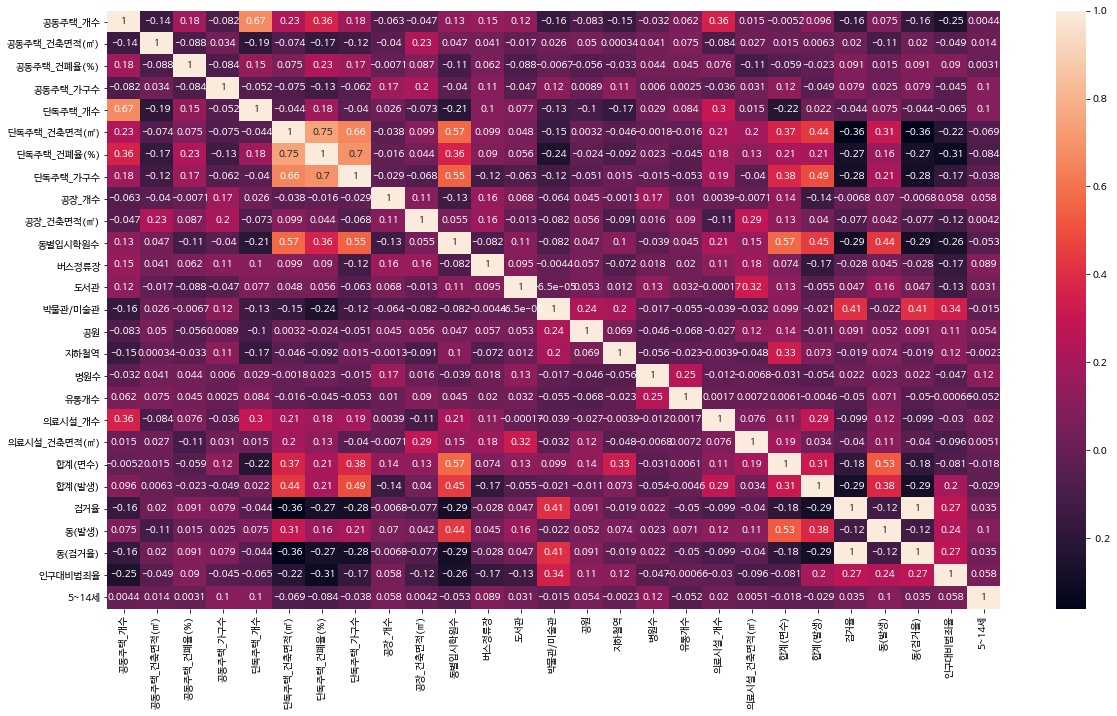

In [44]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.figure(figsize=(20,11))
Var_Corr = all[['공동주택_개수', '공동주택_건축면적(㎡)', '공동주택_건폐율(%)',
       '공동주택_가구수', '단독주택_개수','단독주택_건축면적(㎡)', '단독주택_건폐율(%)', '단독주택_가구수', '공장_개수', '공장_건축면적(㎡)',
        '동별입시학원수', '버스정류장', '도서관', '박물관/미술관', '공원', '지하철역', '병원수',
       '유통개수', '의료시설_개수', '의료시설_건축면적(㎡)', '합계(면수)',
       '합계(발생)','검거율', '동(발생)', '동(검거율)', '인구대비범죄율',
      '5~14세']].corr()
sns.heatmap(Var_Corr, annot=True)
plt.rc('font', family='NanumBarunGothic') 
plt.show()